# Intro to DS 094700 spring 2023

---

#HW3

Faculty of Data and Decision Sciences at the Technion – Israel Institute of Technology


## Introduction

In the following notebook we are going to exercise the **data exploration**, **preprocess** phases via the *google colab* platform.<br>
When using data as an input to a model, we can not treat is just as a "bunch of numbers".<br>
Features of the data can be distributed differently, have different meaning, be missing for some (potentially not random) reasons, etc..

This notebook is a skeleton for your work. <br>
You need to fill in the code where you are requested to (questions denoted by **Q**), and submit the full solution via Moodle.<br>
The solution for this exercise is the notebook itself (with your solutions filled in).<br>
In order to work on the notebook on your own, please go to `File > Save a copy in drive`.<br>
Afterwards, change the notebook name to `hw3_123456789_987654321.ipynb` where `123456789` and `987654321` are your ids.<br>
When you're finished, you can download the notebook as a file by `File > Download > Download as .ipynb`. <br>
Your sumbission is a single `.ipynb` file.

In this exercise, you are requested to answer the questions via code cells and text cells, depends on the question.

Your grade on this submission will be binary.

# Data Exploation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(17)

Today we are going to work with the California housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

Please run the following hidden cell:

In [ ]:
#@markdown hidden cell
random_features = list(np.random.choice(range(len(data['feature_names'])), size=3, replace=False))
random_indices1 = list(np.random.choice(range(data['data'].shape[0]), size=20, replace=False))
random_indices2 = list(np.random.choice(range(data['data'].shape[0]), size=5000, replace=False))
data['data'][np.ix_(random_indices1, random_features[:-1])] = np.nan
data['data'][random_indices2, random_features[-1]] = np.nan

Sklearn datasets' interface is similar to dictionary, with keys and values:

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Use this property to answer the following questions:<br>
**Q:** What are the features?, What is the target value? How many observations are there?

In [ ]:
#Features are the following: 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
#The features describe average data information and location for each block in california which is in the dataset
#Target value is: median house value for California districs and the target column of the data set represents numbers between 1.49 to 5.1 in California districs (in 100k dollars)
#There are 20640 observations (*if thats what they mean by observations)

**Q:** Create a pd.DataFrame with all features as columns, as well as the target as column. <br>Make sure you use the features names. Present the first 12 rows of this dataset

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
print(df.head(12))


    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0       NaN   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0       NaN   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5   4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6   3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7   3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8   2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9   3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10  3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11  3.2705      52.0  4.772480   1.024523      1504.0  2.049046     37.85   

### Missing Values

Sometimes our data can have missing values. <br>
This means that for some observations, we do not observe all features, but only a subset of them. <br>Missing data is noted by `nan`. <br>
**Q:** Identify which features have missing values. <br>
How much records are missing this feature? how much missing values precetange is it for each feature?

In [ ]:
# features with nan values: ['AveRooms', 'AveBedrms', 'Population']
# column AveRooms has 5000 nan entries
# percentage of nan values is 24.224806201550386

# column AveBedrms has 20 nan entries
# percentage of nan values is 0.09689922480620156

# column Population has 20 nan entries
# percentage of nan values is 0.09689922480620156

print(df.isnull().sum() / df.shape[0] * 100)

MedInc         0.000000
HouseAge       0.000000
AveRooms      24.224806
AveBedrms      0.096899
Population     0.096899
AveOccup       0.000000
Latitude       0.000000
Longitude      0.000000
target         0.000000
dtype: float64


### Features Distribution

**Q:** Please choose 2 features that have no missing values. For each feature:
* Is this feature categorical? discrete? continuous?
* Describe its meaning (in words)
* Visualize their distribution and note one observation from this visualization.

For visualizations you can use a [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), a [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [displot](https://seaborn.pydata.org/generated/seaborn.displot.html), or [pandas plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Please use log-scale if necessary.


<Figure size 1000x800 with 0 Axes>

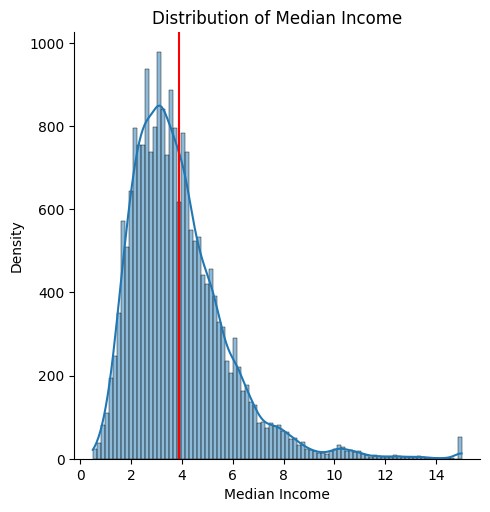

In [ ]:
# MedInc:
# 'the feature is continuous (as a median) as the values range from 0.4999 to 15.001 of income in our data set'
# 'The meaning is the median income in a corresponding block group'

# Displot
plt.figure(figsize=(10, 8))
sns.displot(df['MedInc'], kde=True)
plt.xlabel('Median Income')
plt.ylabel('Density')
# plt.yscale('log') # or maybe remove logscale idk
plt.axvline(x=3.87067, color='red')
plt.title('Distribution of Median Income')
plt.show()

# 'An observation that can be made is that there is a much higher density around income 3.87067

*Answer:*

<ipython-input-9-6632f739aa19>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HouseAge'], hist=False, kde=True,)


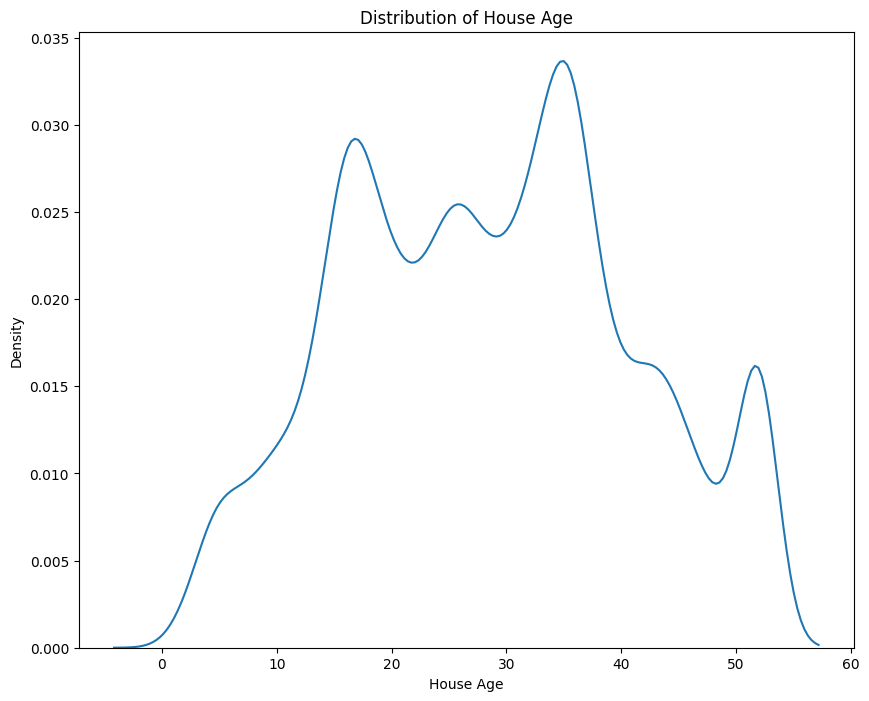

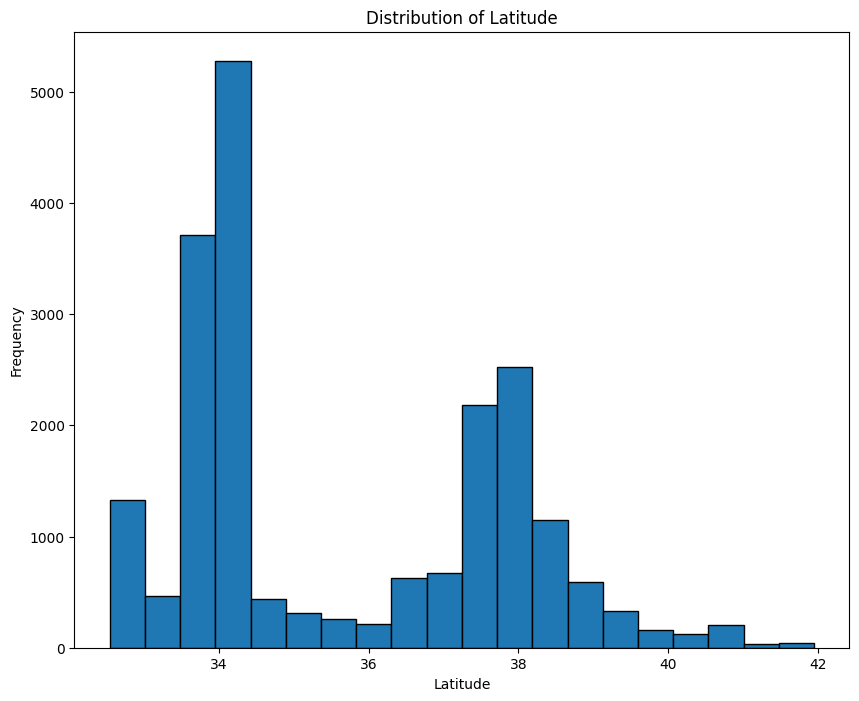

In [ ]:
# HouseAge:
# 'the feature is discrete as the values range from integer numbers 1 to 52 years in our data set'
# 'The meaning is the median house age in that block group'

# Distplot
plt.figure(figsize=(10, 8))
sns.distplot(df['HouseAge'], hist=False, kde=True,)
plt.xlabel('House Age')
plt.ylabel('Density')
plt.title('Distribution of House Age')
plt.show()

# 'An observation that can be made is that there is a much higher density of houses near each other in house ages of 15-40 years old'



# additional one but can ignore :)
# Latitude:
# 'This feature is continous and range from 32.54 to 41.95 with a mean of 35.63'
# 'The meaning is the geographical location in terms of the latitude which a certain measurement'
# 'that together with the longitute one can calculate the exact location of the house.'

# Histogram
plt.figure(figsize=(10, 8))
plt.hist(df['Latitude'], bins=20, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude')
plt.show()
# 'An observation that we can see from the visualization is that at latitude 34 there is a large frequency of house blocks with that latitude'

*Answer:*

## Correlations

We would also like to look for connections between features by looking at the pairwise correlations between features.<br>
**Q:** Plot a heatmap of the feature correlation matrix. <br>
For heatmap visualization you can use either `plt.matshow` or `sns.heatmap`. <br>
Please use 'seismic' colormap, where red = 1 and blue = -1. <br>
Make sure that the names of the features appear in the x and y ticks.

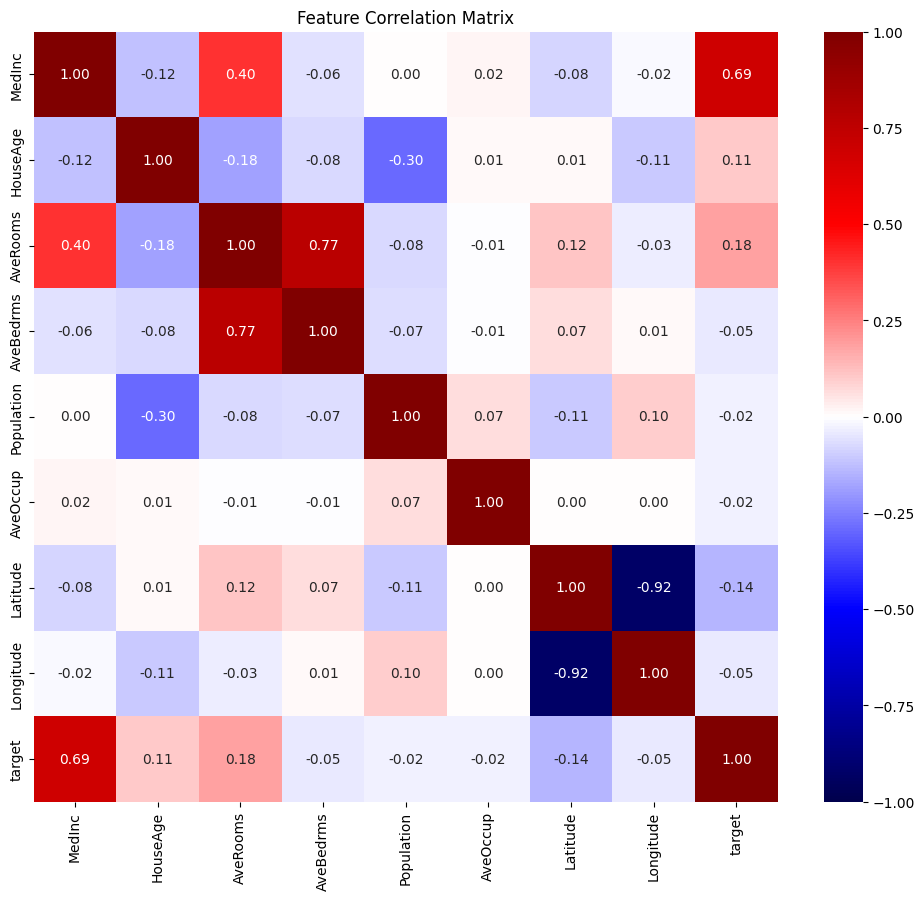

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, cmap='seismic', vmin=-1, vmax=1, annot=True, fmt=".2f", ax=ax)

ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
ax.set_title('Feature Correlation Matrix')

plt.show()

This is the seismic colormap: 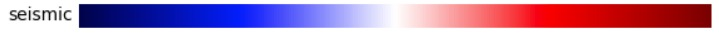<br>
**Q:** Why did we use this kind of colormap? (diverging colormap with white in the middle)

*Answer: in order to see the correlation relationships between different features where blue represents an inverse relationship between the two features as red represents a direct relationship between the two features where the closer they are to -1 or 1 the stronger that relationship is. In addition, white shows that the correlation between the two features is close to 0 which shows that there is little relationship between the two features. Furthermore, the colors help clarify the relationships between the features in our dataset.*

**Q:** What can you tell from looking at this correlation matrix?

*Answer: Overall it would seem that most features don't have a strong relationship to each other as their correlations in the table are close to 0. Therefore we can derive that overall there isn't a strong association between the different features.

Although, Some features, have a stronger correlation to each other. For example:

Firstly there is a negative correlation between longitude and latitude in the correlation matrix, which signifies the opposite relationship between these two geographical coordinates.

Secondly, there is a positive correlation between the average number of rooms and average number of bedrooms, which is logical. As the number of rooms increases, it would make sense that the number of bedrooms would increase.

Thirdly, we can see a positive relationship between median income and the target value, which may signify the feature's role in relation to the target prediction
*

## Handling Missing Data

The data as it currently is, can not just be inserted as input to a model, since some values are missing. <br>
We will tackle this problem in two ways:

### Drop rows

**Q:** For features that their missing precentage is $0 < p < 1\%$ : drop the corresponding records.<br>

Hint: first, identify features that have this precentage. Then, for each feature, take relevant rows (rows with no missing values for this feature) by using `df[feature].notna()`.

In order to validate your operations, you can print the shape of the dataframe before and after, and/or count how many missing values are there now per feature.


In [ ]:
missing_perc = (df.isnull().sum() / len(df)) * 100
print("df before:", df.shape)
features_to_drop = missing_perc[(missing_perc < 1) & (missing_perc > 0)].index

df = df.dropna(subset=features_to_drop)

print("df after:", df.shape)

missing_values_count = df[features_to_drop].isnull().sum()
print("Missing vals per feature:")
print(missing_values_count)

df before: (20640, 9)
df after: (20620, 9)
Missing vals per feature:
AveBedrms     0
Population    0
dtype: int64


### Imputation

We have one feature $f^*$ that its missing precentage is $p > 20\%$. <br>We wouldn't want to drop the corresponding records, that's too much data to throw away.<br>
Therefore, we are going to impute (fill the missing values) by a regression model. This imputation method is called *regression imputation*.<br><br>

Here are the main properties of this regression task:
* features (`X`) : all features besides $f^*$
* target : $f^*$
* train set : records (rows) with complete data (no missing values at all)
* test set : records (rows) with missing data in $f^*$.


Finally, when we have predictions for the test set, we can fill the information in our data, instead of the current missing values. <br>
In the end, we will have complete dataset, with no missing values.

**Q:** Identify (by code) which feature is $f^*$<br>
**Q:** Use `df[feature].isna()` to identify which rows should go to train and which to test.

In [ ]:
target_feature = [feature for feature, per in missing_perc.items() if per > 20][0] # take one feature, we know in this case there is only one
print(target_feature)

AveRooms


**Q:** Put full records (records with no missing values) values of all other features (all features besides $f^*$) in a variable `X_train`.<br>
**Q:** Put full records values of the imputed feature ($f^*$) in a variable `y_train`.<br>
**Q:** Put missing records (records with missing values) values of all other features in a variable `X_test`.

Important notes:
* do not insert the target values into `X_train` or `X_test`. (think why)
* do not insert $f^*$ into `X_train` or `X_test`

In [ ]:
x_features = [col for col in df.columns if col != target_feature]
target_col = df[target_feature]
df_no_na = df[df.notna().all(axis=1)]
df_with_na = df[df.isna().any(axis=1)]

x_train = df_no_na[x_features]
y_train = df_no_na[target_feature]
print(x_train.shape)
print(y_train.shape)

x_test = df_with_na[x_features]
print(x_test.shape)

print(df[target_feature].isna().sum())

(15627, 8)
(15627,)
(4993, 8)
4993


**Q:** Scale data by a scaling method of your choice. You can use [sklearn scalers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) (e.g. StandardScaler, MinMaxScaler...)

* Remember to fit the scaler only by train data.
* Remember not to scale the target variable.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Now we are set to train our regression model. We will use [regression KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)<br>
**Q:** Train the regression model with `X_train, y_train` and predict values for `X_test`. Set `n_neighbors=5`

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

**Q:** Use the predictions to impute your missing values in the data.<br>Validate your answer by counting the number of missing data (should be 0).

In [ ]:
df.loc[df_with_na.index, target_feature] = y_pred

print("Number of predicted values (to fill): " + str(y_pred.shape[0]))
print("Number of NaN's: " + str(df[target_feature].isna().sum()))

Number of predicted values (to fill): 4993
Number of NaN's: 0
